In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Selecting only first two features (Sepal Length and Sepal Width)
y = iris.target

# Split the data into training and testing sets
XX_train, XX_test, YY_train, YY_test = train_test_split(X, y, test_size=0.20, random_state=123)  # You should replace 123 with the last three digits of your student ID

# Define models
models = {
    "SGD (Hinge Loss)": SGDClassifier(loss="hinge"),
    "SGD (Modified Huber Loss)": SGDClassifier(loss="modified_huber"),
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear Kernel)": SVC(kernel="linear"),
    "SVM (RBF Kernel)": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(criterion="gini"),
    "Random Forest": RandomForestClassifier(),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
accuracies_train = {}
accuracies_test = {}

for name, model in models.items():
    model.fit(XX_train, YY_train)
    train_pred = model.predict(XX_train)
    test_pred = model.predict(XX_test)
    accuracies_train[name] = accuracy_score(YY_train, train_pred)
    accuracies_test[name] = accuracy_score(YY_test, test_pred)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies_train.keys()), list(accuracies_train.values()), color='skyblue', label='Training Accuracy')
plt.barh(list(accuracies_test.keys()), list(accuracies_test.values()), color='salmon', label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.legend()
plt.show()

# Print accuracies
print("Model Accuracies on Training Data:")
for name, acc in accuracies_train.items():
    print(f"{name}: {acc}")

print("\nModel Accuracies on Testing Data:")
for name, acc in accuracies_test.items():
    print(f"{name}: {acc}")

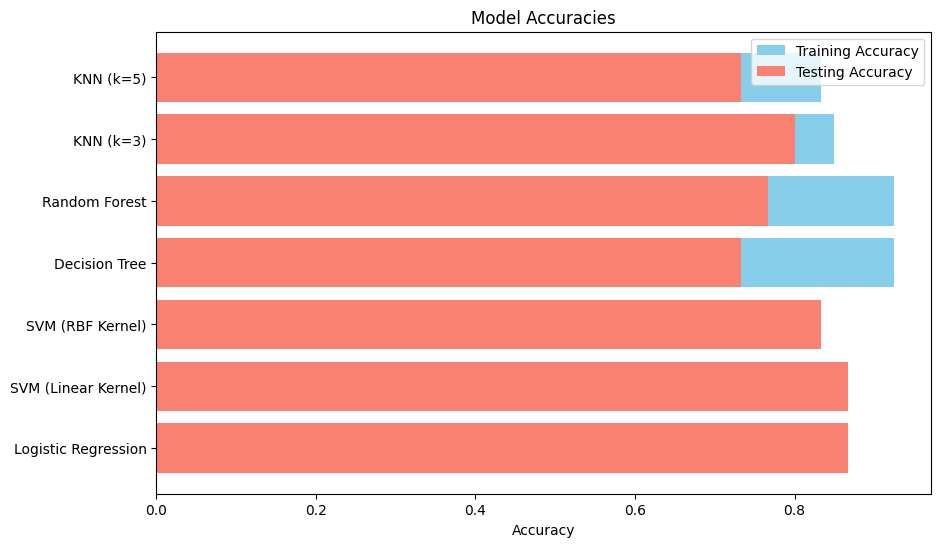

Model Accuracies on Training Data:
Logistic Regression: 0.8
SVM (Linear Kernel): 0.7916666666666666
SVM (RBF Kernel): 0.775
Decision Tree: 0.925
Random Forest: 0.925
KNN (k=3): 0.85
KNN (k=5): 0.8333333333333334

Model Accuracies on Testing Data:
Logistic Regression: 0.8666666666666667
SVM (Linear Kernel): 0.8666666666666667
SVM (RBF Kernel): 0.8333333333333334
Decision Tree: 0.7333333333333333
Random Forest: 0.7666666666666667
KNN (k=3): 0.8
KNN (k=5): 0.7333333333333333


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Selecting only first two features (Sepal Length and Sepal Width)
y = iris.target

# Split the data into training and testing sets
XX_train, XX_test, YY_train, YY_test = train_test_split(X, y, test_size=0.20, random_state=123)  # You should replace 123 with the last three digits of your student ID

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear Kernel)": SVC(kernel="linear"),
    "SVM (RBF Kernel)": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(criterion="gini"),
    "Random Forest": RandomForestClassifier(),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
accuracies_train = {}
accuracies_test = {}

for name, model in models.items():
    model.fit(XX_train, YY_train)
    accuracies_train[name] = model.score(XX_train, YY_train)
    accuracies_test[name] = model.score(XX_test, YY_test)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies_train.keys()), list(accuracies_train.values()), color='skyblue', label='Training Accuracy')
plt.barh(list(accuracies_test.keys()), list(accuracies_test.values()), color='salmon', label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.legend()
plt.show()

# Print accuracies
print("Model Accuracies on Training Data:")
for name, acc in accuracies_train.items():
    print(f"{name}: {acc}")

print("\nModel Accuracies on Testing Data:")
for name, acc in accuracies_test.items():
    print(f"{name}: {acc}")

# Discuss results...


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('iris.csv', 
                   header = None, 
                   names=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"])


# 0 = sepal length (cm)
# 1 = sepal width (cm)
# 2 = petal length (cm)
# 3 = petal width (cm)

X = df[[0, 1, 2, 3]]
y = df[4]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 62)

# 1. Stochastic gradient descent using the hinge loss function
from sklearn.linear_model import SGDClassifier

#Classifier with hinge loss and L2 regularization
clf = SGDClassifier(loss="hinge", penalty="l2")

#Fit classifier to training data
clf.fit(X_train, y_train)

#Predict + calculate accuracy on the training data
training_accuracy = clf.score(X_train, y_train)
print(f'Model accuracy with SGD (Hinge Loss function) on training data: {training_accuracy}')

#Predict + calculate accuracy on the test data
test_accuracy = clf.score(X_test, y_test)
print(f'Model accuracy with SGD (Hinge Loss function) on test data: {test_accuracy}')





KeyError: "None of [Index([0, 1, 2, 3], dtype='int32')] are in the [columns]"